# <span style="color:red">Seaborn | Part-10: Box Plot</span>

Welcome to another lecture on Seaborn! 

Today we shall be discussing another important type of plot, i.e. Box Plot. Earlier we've seen plots for linear dataset, and then moved on to focus particularly on Categorical variables. The plot we've decided to cover in this lecture fits the bill very well when we have to show an abstract representation of each distribution of observations, more specifically categorical variables.

A **Box plot** shows the *spread of all the data points*, and also fetches other intrinsic information like the **median** or where most of the data cluster are, thus reflecting *average trend*. Basically, it is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the **second and third quartiles**, usually with a *vertical line* inside it, to indicate the *median* value. The **lower and upper quartiles** are shown as *horizontal lines* on either side of this rectangle.

Thus it depicts group of numerical data through their *quartiles* in **Descriptive statistics**. To give an elementary level understanding, **Descriptive statistics** is used to describe the basic features of a dataset, providing simple summaries about the sample and related measures, like median. Together with plots like a Box plot, they form the basis of virtually every quantitative analysis of data.

I know I'm bringing in Statistics under our hood, but I assure to breeze through all of this. So, as per **Probability Theory**, a **Quartile** is a just a type of **Quantile**, which are actually the **three cut points** dividing a **probability distribution** of a dataset into **four equal-size groups**. These are **contiguous intervals** with equal probabilities, or rephrasing, divides the observations in a *sample* in the same way.

There is a very important concept involved with Box Plot, i.e. **Whisker** and we shall try to understand the purpose of its' association with **Box Plot** BUT before that let us actually get a Box Plot plotted. So let us begin with ifetching our dependancies, that we use in every lecture:

In [113]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(44)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid", palette="icefire")
import warnings
warnings.filterwarnings("ignore")

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

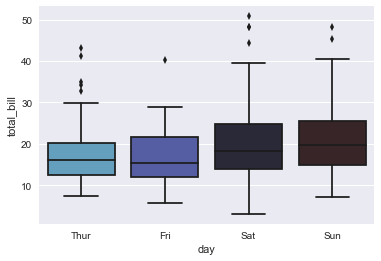

In [17]:
# Loading built-in Tips dataset:
tips = sns.load_dataset("tips")

# Plotting basic Box Plot:
sns.boxplot(x="day", y="total_bill", data=tips)

## <span style="color:red">Anatomy of Box Plot:</span>

This plot isn't visually something new for us but I am pretty sure that a thought has often popped up in our head as to what are those bars. We got introduced to this term **Whisker** even in our previous lecture of **Strip Plot**, so let us know dive in and get a better insight. There are **three horizontal bars** that we notice. Let us consider the *first box* on our plot, i.e for *Thursday* on *X-axis*. 

- So, the **first bar** (top-most one), shows the **maximum range variation** at a total bill amount of *30*.
- **Second bar** within the box, shows the **median** at a total bill amount of *15*.
- And, our **third bar** at the bottom, shows the **minimum range variation** of total bill, amounting somewhere around *8*.

Talking about the box in our **Box Plot**, the **bottom spine** is actually the **first quartile**; and **top spine**, at a value of *20* is our **third quartile**. Finally, the **vertical line** connecting these bars are just an indicator of **range of data points**.

Well then, what about those **dots beyond our maximum range**? Those are known as **Outliers**. Mathematically, these Outliers are generally *at least 3 times* the *difference between third and first quartile*. Now, you might think that even in our Box plot for Thursday, the dots do not seem to be at a distance thrice the difference. And, you are correct! 

So, there is another type of **Outlier**, that is known as **Suspected Outliers**. These are generally 1.5 times the difference, and no points for guessing why they're are termed as **"Suspected"**. Statistically if required to be stated, you may say that **Outliers** are beyond the **Outer Fence**, and **Suspected Outliers** are beyond the **Inner Fence**. *Inner fence* is nothing but our *first bar* on plot and *Outer Fence* is the distance between **third quartile** (top spine of our box) and **Inner fence**, above *Inner fence*.

Let us quickly plot another Box plot with few variations before we start discussing further on this topic:

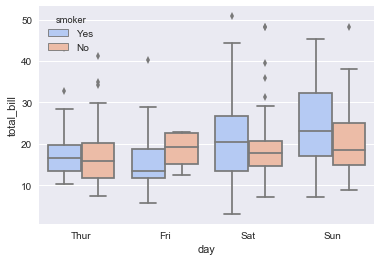

In [15]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm")

Nothing new here as of now in terms of *Optional parameters*, but what we notice differently is that as per `hue` parameter, i.e. `Smoker`, it is helping us visualize data points in *two separate boxes for each day*.

Let us once again visualize multiple Box plots on a single frame with some random data this time:

In [78]:
# Creating regular sample Pandas DataFrames:
sample_1 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Attempt=1)
sample_2 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Attempt=2)
sample_3 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Attempt=3)

# Concatenating all created DataFrames:
sample_combo = pd.concat([sample_1, sample_2, sample_3])

# Melting concatenated DataFrame:
melt_df = pd.melt(sample_combo, id_vars=["Attempt"], var_name=["Values"])

melt_df.head()

,Attempt,Values,value
0,1,1,-0.195128
1,1,1,-0.243974
2,1,1,1.295763
3,1,1,0.160567
4,1,1,0.077472


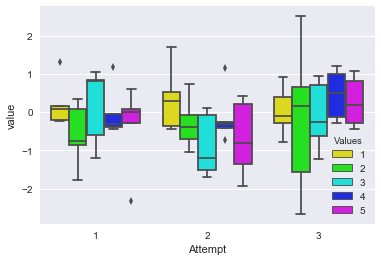

In [82]:
sns.boxplot(x="Attempt", y="value", hue="Values", data=melt_df, palette="hsv")

There are three statistical terms that I would like you to research more on your own, and learn about it, if you wish to have a firm grip on **Univariate Data Analysis**. Honestly, these are nothing conceptually difficult or uncommon. So to give you an idea, these are:

- **Distribution:** which is just a summary of the frequency of individual values, or range of values for a variable. Simplest distribution would list every value of a variable and the number of factors who had each value. One of the most common ways to describe a single variable is with a **Frequency distribution**.

- Next one is **Central Tendency** that includes **Mean**, **Median** and **Mode**. 
 **Mean** being the average of all the values, that we get by adding up all the values and then dividing the sum by number of   values. **Median** being the score found at the *exact middle* of a set of values, which can be computed by listing all scores in numerical order, and then locate the score in the center of the sample. Finally, **Mode** refers to the *most frequently* occurring value in a set of scores.

- Finally, we have **Dispersion:** This is one of the most talked about factor statistically as it refers to the spread of values around the **Central Tendency**. There are two common measures of dispersion: **Range** and **Standard Deviation**. You can think of *Range* as the highest value minus the lowest value in a distriution.

This is slowly turning out to be more of a Statistics course, instead of a Data Visualization course, so I shall right away get back on track and we shall look into Seaborn official documentation for the optional parameters allowed in a Box Plot. Later on, we shall observe more on variations and few more real-world scenarios:

`seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None)`

Here, *just one variable* on any axis would also be enough, if properly referenced to the dataset, for us to get the figure to be plotted. Let us try this at first, before considering other params:

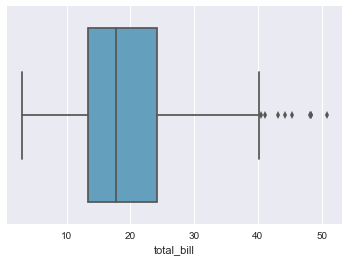

In [16]:
sns.boxplot(x=tips["total_bill"])

Easy, right? You can see what I was talking about. Let us go through other params now, just the ones which are actually new for us. So, we have `saturation` parameter which controls the **proportion of original saturation** to draw colors at. By default it is set to 1 and can be increased or decreased as well like:

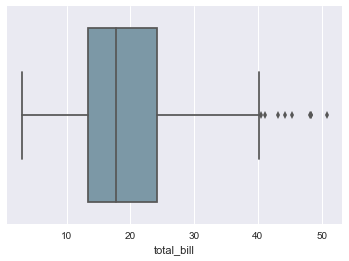

In [20]:
sns.boxplot(x=tips["total_bill"], saturation=0.35)

And that *fades the original color* by a certain percentage, depending on our input. Then we have `fliersize` that controls size of the markers used to indicate outlier observations. We also have `whis` parameter that represents **proportion of IQR**, past the *low and high quartiles* to extend the plot whiskers. Do not really have to get confused with this abbreviation, as **IQR** just stands for **Inter-Quartile Range**. Lastly, we have `notch`, which by default is set to `False`, and helps to indicate a **Confidence Interval for the median** within a box. Let us plot to comprehend better:

In [71]:
# Fetching Titanic dataset and previewing:
titanic = sns.load_dataset("titanic")

titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


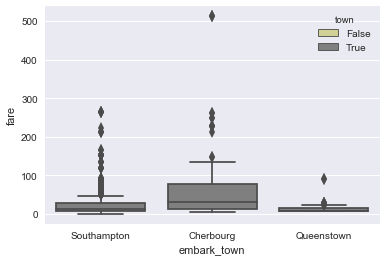

In [58]:
titanic["town"] = titanic["embark_town"].isin(["Southampton", "Cherbourg", "Queenstown"])
sns.boxplot(x="embark_town", y="fare", hue="town", data=titanic, dodge=False, fliersize=8, whis=1)

Titanic dataset didn't turn out to be a good dataset for my experiment but anyways, what we tried to do here is that: We created a variable `town`to use `hue` parameter without changing box position or it's width. Actually, let us try it on Tips:

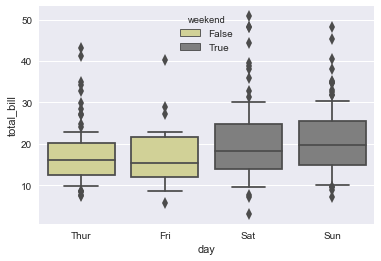

In [59]:
# Creating Hue param:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])

sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False, fliersize=8, whis=0.5)

Although we have seen enough coupling with other type of plots, let us actually see one more coupling of plot before we jump into *mix n match* with some known/unknown data:

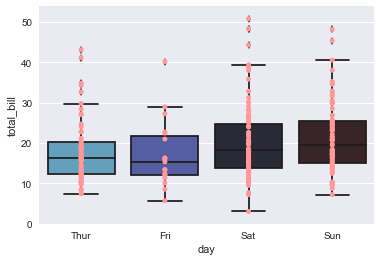

In [66]:
sns.boxplot(x="day", y="total_bill", data=tips)
sns.stripplot(x="day", y="total_bill", data=tips, color=tableau_20[7])

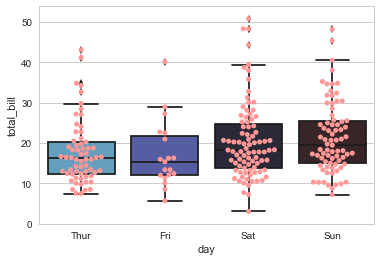

In [69]:
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=tableau_20[7])

For a change, if you don't want Outliers to be displayed, then you just need to adjust `flierprops` parameters. Basically, we should be able to pass any arguments to `seaborn.boxplot` that we can pass to `plt.boxplot`:

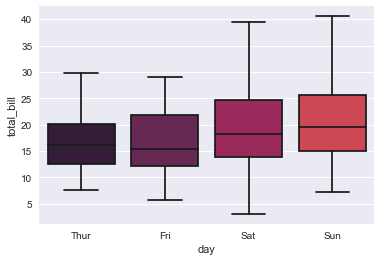

In [89]:
sns.boxplot(x="day", y="total_bill", data=tips, showfliers=False)

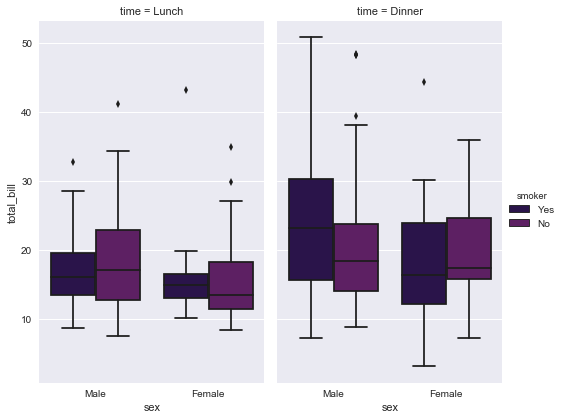

In [97]:
sns.factorplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips, kind="box", size=6, aspect=.6)

Few *important things to remember* about **Box Plot** that I would like you to make a note of would be:

- Outliers are expected in normally distributed datasets with more than about 10,000 data-points. Suspected outliers are common in large normally distributed datasets (say more than 100 data-points).
- Outliers aren't necessarily *"bad"* data-points. Indeed they might be utmost important, most information rich part of our dataset. So under no circumstances should you remove those from the dataset. This is where beginners often make mistake so I would like you to be extra-considerate with Outliers.
- One case of particular concern where a Box plot can be deceptive is: When dataset is distributed into "two lumps/chunks/clusters" rather than the "one lump" cases because in such scenarios, a box plot might not be a good choice. Instead I would suggest choosing a swarm plot instead.

Moving on, let us this time consider something new to take care of. Yes! We're going to plot a set of **Prediction Accuracy scores** that we get from a **Machine Learning algorithm**. Let me fetch a small chunk out of it, just to demonstrate:

In [106]:
# Preview of Algorithm:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

predictions = []
for trees in range(1,41):
    model = RandomForestClassifier(n_estimators=trees)
    score_list = cross_val_score(model, X, Y, cv=10)
    predictions.append(score_list)

# Declaring Prediction accuracy as 'Score':
predictions = {'0':[0.8757764, 0.86335404, 0.75625, 0.85, 0.86875, 0.81875, 0.79375, 0.79245283, 0.8490566, 0.85534591], 
               '1':[0.89440994, 0.8447205, 0.79375, 0.85, 0.8625, 0.85625, 0.86875, 0.88050314, 0.86792453, 0.8427673], 
               '2':[0.91304348, 0.9068323, 0.83125, 0.84375, 0.8875, 0.875, 0.825, 0.83647799, 0.83647799, 0.87421384], 
               '3':[0.86956522, 0.86956522, 0.85, 0.875, 0.88125, 0.86875, 0.8625, 0.8490566, 0.86792453, 0.89308176]}

# Creating a Pandas DataFrame out of it:
df = pd.DataFrame(predictions)

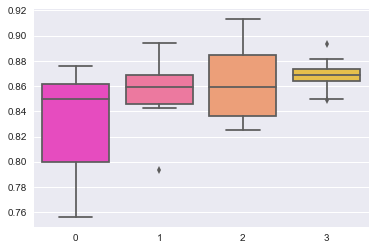

In [112]:
sns.boxplot(data=df, palette="spring")

With all these variations that we've learnt, we now have a pretty good idea to deal with Box Plot. In the next lecture, we shall be dealing with **Violin plot** that we've already seen couple of times, but this time it would be a detailed discussion about it's scope, variations and few more real-world scenarios.

Till then, as always, I would highly recommend to play around with these plots as much as you can and if you have any doubts, feel free to post in the forum.

And, I shall meet you in the next lecture where we will discuss *Violin Plot*. Till then, Happy Visualizing!